**Please only run the following cell if you're running this notebook on Google colab or another cloud hosted notebook server.**

In [0]:
!pip install qiskit

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer, IBMQ, execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram


%pylab inline

Populating the interactive namespace from numpy and matplotlib


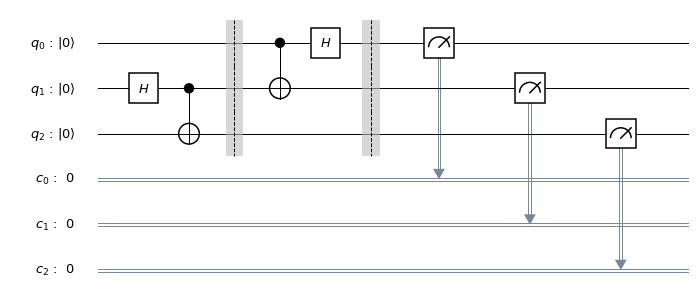

In [5]:
q = QuantumRegister(3, "q")
c = ClassicalRegister(3, "c")
teleport = QuantumCircuit(q, c, name="teleport")

# Prepare an initial state
# teleport.x(q[0])
# teleport.u3(0.3, 0.2, 0.1, q[0])

# Prepare a Bell pair
teleport.h(q[1])
teleport.cx(q[1], q[2])

# Barrier following state preparation
teleport.barrier(q)

# Measure in the Bell basis
teleport.cx(q[0], q[1])
teleport.h(q[0])

teleport.barrier(q)

teleport.measure(q, c)

teleport.draw(output = 'mpl')

In [0]:
token = ''
IBMQ.enable_account(token)

In [0]:
# backend = BasicAer.get_backend('qasm_simulator')
# backend = IBMQ.get_backend('ibmq_16_melbourne')
# backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator)) # Gets the least busy IBM Q machine
backend = IBMQ.get_backend('ibmq_qasm_simulator')

job = execute(teleport,backend,shots=8192)

job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)


Job Status: job is queued (3)       